# Case Study by: Mohammed Saqlain Attar 

## 1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2. Find out the unique number of high level class.

In [3]:
df['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

## 3. Use the 16-intermediate feature and perform an agglomerative clustering.[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
agg = AgglomerativeClustering(n_clusters=3)

In [6]:
predicted_values = agg.fit_predict(df.loc[:,'hair':'catsize'])
predicted_values

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0], dtype=int64)

## 4. Compute the mean squared error by comparing the actual class and predicted high level class.


In [7]:
from sklearn import metrics

In [8]:
print(metrics.mean_squared_error(predicted_values, df["class_type"]))

8.554455445544555


In [9]:
import numpy as np

In [10]:
X = np.array(df.loc[:,'hair':'catsize'])

In [11]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [12]:
X.shape

(101, 16)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [14]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [15]:
Z = linkage(X, 'ward')

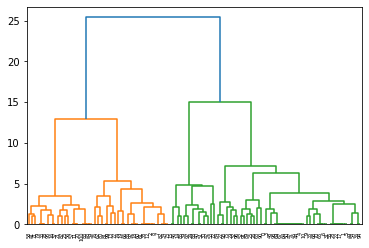

In [16]:
dn = dendrogram(Z)